# NASDAQ Index and ARIMA Model

In [15]:
%pip install yfinance
%pip install yfinancials
%pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement yfinancials (from versions: none)
ERROR: No matching distribution found for yfinancials
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Imports and set magics:

In [16]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Getting all the packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Create a Ticker object for the NASDAQ index
ticker = yf.Ticker('^IXIC')

# Download historical price data
nasdata = ticker.history(period='3y')[['Close']]

# Format the date column as yyyy-mm-dd
nasdata.index = nasdata.index.strftime('%Y-%m-%d')

# Take log differences of the Close variable
nasdata['Close_logdiff'] = np.log(nasdata['Close']).diff()


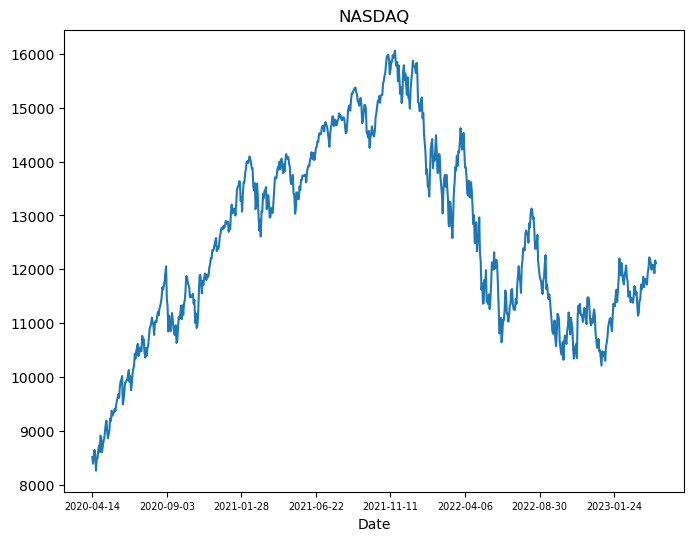

In [18]:
# Plot the original Close variable
nasdata['Close'].plot(figsize=(8, 6))
plt.title('NASDAQ')
plt.xticks(fontsize=7) # set the font size of the x-axis labels
plt.show()

/Users/rachelrea/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


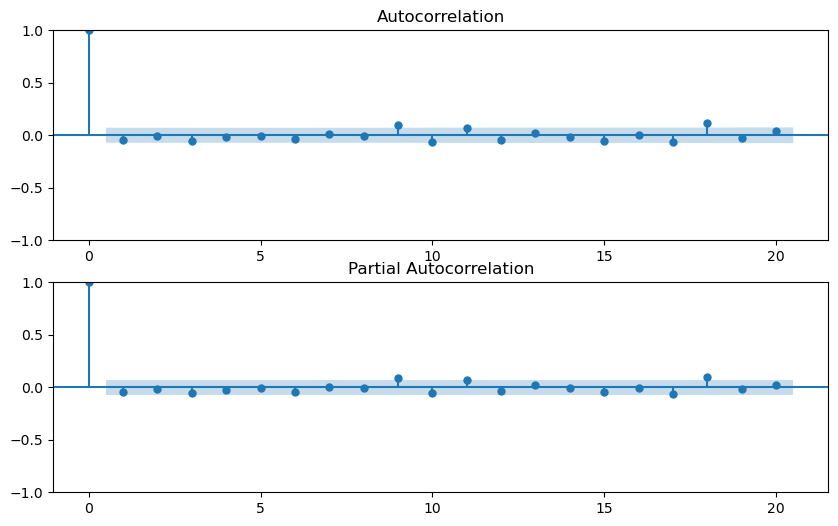

In [19]:
# Plot the ACF and PACF of the log differences to determine the AR and MA parameters
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
plot_acf(nasdata['Close_logdiff'].dropna(), lags=20, ax=ax[0])
plot_pacf(nasdata['Close_logdiff'].dropna(), lags=20, ax=ax[1])
plt.show()

In [20]:
#We see from the acf and pacf that the first lags are significant for both the ar and ma terms.
# Fit an ARIMA model to the log differences with the selected AR and MA parameters
model = ARIMA(nasdata['Close_logdiff'].dropna(), order=(1,0,1))
result = model.fit()

# Print the summary of the model results
print(result.summary())

/Users/rachelrea/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rachelrea/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/rachelrea/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Close_logdiff   No. Observations:                  756
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2066.682
Date:                Fri, 14 Apr 2023   AIC                          -4125.363
Time:                        17:11:12   BIC                          -4106.851
Sample:                             0   HQIC                         -4118.233
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.848      0.396      -0.001       0.002
ar.L1          0.5283      0.400      1.321      0.186      -0.255       1.312
ma.L1         -0.5736      0.387     -1.481      0.1

/Users/rachelrea/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 # Discussion

From figure x we see that the Nasdaq increased substanitally after 2020 probably caused by increases in the money supply. 


The results show that the ARIMA model was able to reasonably well capture the patterns in the data when fitted to the log differences of the NASDAQ closing price. The model has a high log likelihood, which suggests that it fits the data well, according to the summary statistics. The AIC, BIC, and HQIC values are all negative as well, indicating that the model fits the data well compared to other models.

The first lags are significant for both the AR and MA components, according to the ACF and PACF plots of the log differences. This implies that the data may exhibit some autocorrelation, which the model may detect.

According to the coefficient estimates for the AR and MA components, there isn't any strong evidence of autoregressive or moving average patterns in the data at the 5% level of significance. Although these coefficients have rather significant standard errors, this could be because financial time series data naturally contain noise.

A constant term that is not statistically significant is also included in the model. This implies that there isn't any proof that the data have significantly drifted over time.

Overall, the ARIMA model's findings indicate that there may be some autocorrelation in the log differences of the NASDAQ closing price, but there isn't a lot of proof that moving average or autoregressive patterns exist. The noise present in financial time series data may be to blame for this.

